# KNN 이진분류
- 오렌지, 그레이프후루츠 2진분류

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

SEED = 42

## 1.데이터준비

In [ ]:
# !wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/citrus.csv

In [ ]:
citrus = pd.read_csv('citrus.csv')
citrus.shape

FileNotFoundError: [Errno 2] No such file or directory: 'citrus.csv'

In [ ]:
citrus.head()

In [ ]:
df = citrus.copy()
df.info()

In [ ]:
df.describe().T

### 범주형변수

### 결측치(Missing Values)

In [ ]:
df.isna().sum(axis=0)

NameError: name 'df' is not defined

### 중복치

In [ ]:
df.duplicated().sum()

0

## 2.학습용, 테스트 분리

In [ ]:
df = df.sample(frac=1, random_state=SEED)
df.head()

,name,diameter,weight,red,green,blue
4427,orange,9.97,175.77,153,97,2
5691,grapefruit,10.12,176.09,148,63,10
5963,grapefruit,10.42,180.46,161,72,12
1016,orange,7.45,137.41,157,84,24
7722,grapefruit,11.60,199.67,161,70,11


In [ ]:
idx_train = int(len(df) * 0.6)
idx_val = int(len(df)* 0.8)

In [ ]:
train = df.iloc[:idx_train, :]
val = df.iloc[idx_train:idx_val, :]
test = df.iloc[idx_val:, :]

train.shape, val.shape, test.shape

((6000, 6), (2000, 6), (2000, 6))

### X, y 변수 분리

In [ ]:
X_train = train.drop('name', axis=1)
y_train = train['name']

In [ ]:
X_val = val.drop('name', axis=1)
y_val = val['name']

In [ ]:
y_train.value_counts(), y_val.value_counts()

(name
 grapefruit    3018
 orange        2982
 Name: count, dtype: int64,
 name
 orange        1011
 grapefruit     989
 Name: count, dtype: int64)

## 스케일링

In [ ]:
u = X_train.mean()
std = X_train.std()

u, std

(diameter      9.986723
 weight      175.223978
 red         153.772000
 green        75.968667
 blue         11.423167
 dtype: float64,
 diameter     1.956197
 weight      29.331940
 red         10.575979
 green       11.757709
 blue         9.093672
 dtype: float64)

In [ ]:
X_train_s = (X_train - u)/std

X_train_s.head()

,diameter,weight,red,green,blue
4427,-0.008549,0.018615,-0.072996,1.788727,-1.036233
5691,0.068130,0.029525,-0.545765,-1.102993,-0.156501
5963,0.221489,0.178509,0.683436,-0.337537,0.063432
1016,-1.296763,-1.289174,0.305220,0.683070,1.383031
7722,0.824701,0.833427,0.683436,-0.507639,-0.046534


In [ ]:
X_val_s = (X_val - u)/std
X_val_s.head()

,diameter,weight,red,green,blue
8589,1.126306,1.126622,-0.262103,-0.252487,1.822898
3766,-0.345938,-0.328106,0.683436,-0.422588,0.173399
2041,-0.918478,-0.912793,0.305220,1.193373,-1.036233
9384,1.494367,1.511186,-0.829427,-1.273094,-1.036233
1786,-1.000269,-0.997342,0.305220,0.512968,-1.036233


In [ ]:
ss_dic = {'mean':u, 'std':std}
ss_dic

{'mean': diameter      9.986723
 weight      175.223978
 red         153.772000
 green        75.968667
 blue         11.423167
 dtype: float64,
 'std': diameter     1.956197
 weight      29.331940
 red         10.575979
 green       11.757709
 blue         9.093672
 dtype: float64}

## 인코딩

In [ ]:
label_dict = {'grapefruit':0, 'orange':1}

In [ ]:
y_train_e = y_train.map(label_dict)
y_val_e = y_val.map(label_dict)

y_train_e, y_val_e

(4427    1
 5691    0
 5963    0
 1016    1
 7722    0
        ..
 2494    1
 1469    1
 1122    1
 1466    1
 514     1
 Name: name, Length: 6000, dtype: int64,
 8589    0
 3766    1
 2041    1
 9384    0
 1786    1
        ..
 7162    0
 9703    0
 3508    1
 4868    1
 2831    1
 Name: name, Length: 2000, dtype: int64)

In [ ]:
X_train_s = X_train_s.to_numpy()
y_train_e = y_train_e.to_numpy()

X_val_s = X_val_s.to_numpy()
y_val_e = y_val_e.to_numpy()

In [ ]:
print(X_train_s.shape, y_train_e.shape)
print(X_val_s.shape, y_val_e.shape)
print(type(X_train_s), type(y_train_e))
print(type(X_val_s), type(y_val_e))

(6000, 5) (6000,)
(2000, 5) (2000,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


## 모델 학습

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train_s, y_train_e)



KNeighborsClassifier()

###검증

In [ ]:
y_pred = clf.predict(X_val_s)
y_pred

array([0, 0, 1, ..., 1, 0, 1])

In [ ]:
y_val_e

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
(y_pred == y_val_e).sum()/len(y_val_e)

0.9175

In [ ]:
from sklearn.metrics import accuracy_score

scores = []
for k in range(3, 30):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train_s, y_train_e)
    y_pred = clf.predict(X_val_s)
    acc = accuracy_score(y_val_e, y_pred)
    scores.append(acc)

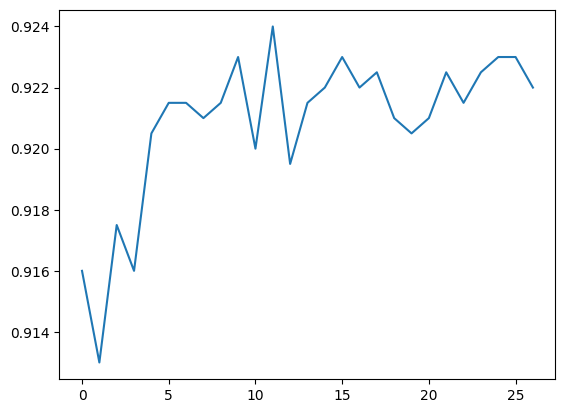

In [ ]:
plt.plot(scores)

## 테스트

In [ ]:
test.head()

,name,diameter,weight,red,green,blue
1440,orange,7.79,142.14,176,74,6
8345,grapefruit,12.02,205.92,153,91,9
5854,grapefruit,10.32,178.96,145,75,10
6832,grapefruit,11.04,190.77,131,58,16
7371,grapefruit,11.37,196.29,165,67,15


In [ ]:
X_test = test.drop('name', axis=1)
y_test = test['name']

In [ ]:
X_test_s = (X_test - ss_dic['mean'])/ss_dic['std']
y_test_e = y_test.map(label_dict)

In [ ]:
X_test_s = X_test_s.to_numpy()
y_test_e = y_test_e.to_numpy()

In [ ]:
y_pred = clf.predict(X_test_s)

In [ ]:
(y_test_e == y_pred).sum()/len(y_test_e)

0.913

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test_e, y_pred)
cfm

array([[912,  81],
       [ 93, 914]])

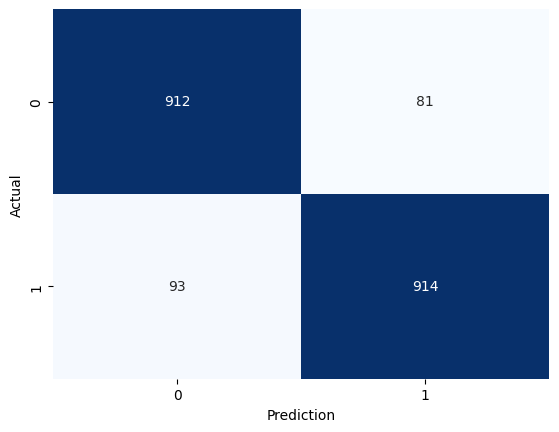

In [ ]:
s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
s.set(xlabel='Prediction', ylabel='Actual')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

print('accuracy:', accuracy_score(y_test_e, y_pred))
print('recall:', recall_score(y_test_e, y_pred))
print('precision:', precision_score(y_test_e, y_pred))
print('f1 :', f1_score(y_test_e, y_pred))


accuracy: 0.913
recall: 0.9076464746772592
precision: 0.9185929648241206
f1 : 0.913086913086913


In [ ]:
# 정확도 계산